# AdventureWorks Analysis
From EdX Microsoft DAT 275x course, "Principles of Machine Learning: Python Edition"
## 4. Classification - Logistic Regression 

### The logistic regression model will predict whether or not a customer will purchase a bike. 

In [72]:
#Load required packages 

import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [73]:
#Import training set 

df_1 = pd.read_csv('working_df.csv')
print(df_1.shape)
df_1.head()

(16471, 13)


,BikeBuyer,Country,Education,Occupation,Gender,MaritalStatus,Home,AveMoSpend,Income,BirthYear,Cars,Child_Home,Child_Total
0,0,Australia,Bachelors,Professional,M,M,1,89,137947,1966,0,0,2
1,1,Australia,Bachelors,Professional,M,S,0,117,101141,1965,1,3,3
2,0,Australia,Bachelors,Professional,M,M,1,123,91945,1965,1,3,3
3,0,Australia,Bachelors,Professional,F,S,0,50,86688,1968,1,0,0
4,1,Australia,Bachelors,Professional,F,S,1,95,92771,1968,4,5,5


### Feature Selection 

The following features are selected to include in the logistic regression model based on the work completed in the second workbook on exploratory data analysis and visualizations, "2_AW_EDA and Visualization": 

* Numeric: 
    * Income 
    * BirthYear
    * Cars
    * Child_Home
* Categorical: 
    * Occupation 
    * Gender
    * MaritalStatus

Load file and select features that will be used in the regression model.


### Data Preparation 

In [74]:
#Create a NumPy array for the label.

labels = np.array(df_1['BikeBuyer'])

### Prepare Model Matrix 

All scikit-learn models require a numpy array containing numeric values only for the features. This matrix is called a model matrix. Creating a model matrix requires the following steps: 

* Convert categorical features to dummy variables.
* Add numeric features.
* Split data into training and test sets.
* Rescale numeric features. Test data is scaled using parameters from the training data. 

In [79]:
# Convert categorical features to dummy variables 

def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder(categories = 'auto')
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Gender','MaritalStatus']

Features = encode_string(df_1['Occupation'])
for col in categorical_columns:
    temp = encode_string(df_1[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :]) 

(16471, 9)
[[0. 0. 0. 1. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1.]]


In [80]:
# Add numeric features

Features = np.concatenate([Features, np.array(df_1[['Income', 'BirthYear','Cars', 'Child_Home']])], axis = 1)
print(Features.shape)
print(Features[:2, :])   

(16471, 13)
[[0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 1.00000e+00 0.00000e+00 1.37947e+05 1.96600e+03 0.00000e+00
  0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 1.00000e+00 1.01141e+05 1.96500e+03 1.00000e+00
  3.00000e+00]]


In [81]:
#Randomly sample cases to create independent training and test data sets

nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 3000)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [82]:
# Rescale numeric features for the training set 

scaler = preprocessing.StandardScaler().fit(x_train[:,9:])
x_train[:,9:] = scaler.transform(x_train[:,9:])
x_test[:,9:] = scaler.transform(x_test[:,9:])
x_train[:2,]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.97823008,
         0.83512348,  2.20154661,  2.64963433],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        , -1.39076974,
        -0.84636409,  0.43902711, -0.65529382]])

### Logistic regression model

In [84]:
#Define the model

logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(x_train, y_train)

/Users/stephendavenport/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
#Print model coefficients

print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.03536329]
[[-3.13328456e-01  2.07085043e-01 -4.98170345e-01  5.95554740e-01
  -2.65042684e-02 -1.21915831e-01  8.65525436e-02 -1.90116637e-01
   1.54753350e-01  2.08910876e-01 -5.90927721e-04  2.43540911e-01
  -3.43135424e-01]]


In [85]:
#Print the first 10 probabilities for each class. The class with the highest probability is the prediction.
#The first columns is the probability of a score of 0 and the second column is the probability of a score of 1.

probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:10,:])

[[0.8087115  0.1912885 ]
 [0.40863886 0.59136114]
 [0.36970315 0.63029685]
 [0.56796301 0.43203699]
 [0.20238316 0.79761684]
 [0.58531125 0.41468875]
 [0.86454619 0.13545381]
 [0.95515419 0.04484581]
 [0.13474592 0.86525408]
 [0.08213069 0.91786931]]


## Score and evaluate the classification model

In [86]:
#Print a sample of the class scores. 

def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:10]))
print(y_test[:10])

[0 1 1 0 1 0 0 0 1 1]
[1 1 0 1 1 1 0 0 1 1]


In [87]:
#Print performance metrics for the model.

def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1806               221
Actual negative       447               526

Accuracy  0.78
 
           Positive      Negative
Num case     2027           973
Precision    0.80          0.70
Recall       0.89          0.54
F1           0.84          0.61


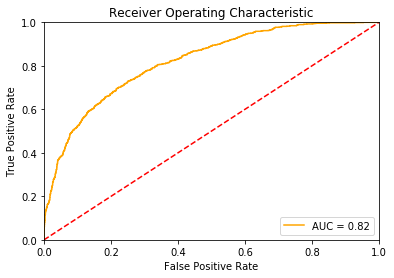

In [89]:
#Display the ROC curve and AUC

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2027                 0
Actual negative       973                 0

Accuracy  0.68
 
           Positive      Negative
Num case     2027           973
Precision    0.68          0.00
Recall       1.00          0.00
F1           0.81          0.00


/Users/stephendavenport/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


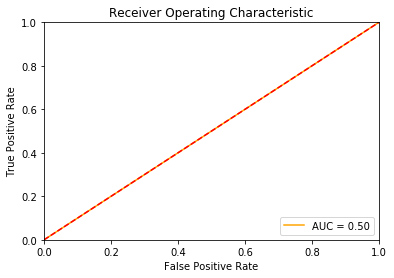

In [90]:
#Display a naive classifier for comparison.

probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 